In [2]:
import numpy as np
import pandas as pd

In [3]:
filepath = '/Users/gracegupta/Downloads/NOTEEVENTS.csv'

In [4]:
pd.read_csv(filepath, nrows=2)

,ROW_ID,SUBJECT_ID,HADM_ID,CHARTDATE,CHARTTIME,STORETIME,CATEGORY,DESCRIPTION,CGID,ISERROR,TEXT
0,174,22532,167853,2151-08-04,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2151-7-16**] Dischar...
1,175,13702,107527,2118-06-14,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2118-6-2**] Discharg...


In [5]:
# Look at the first few rows of the CSV file
dtypes = {"ROW_ID": int, "SUBJECT_ID": int, "HADM_ID": float, "CHARTDATE": str, "CHARTTIME": str,
         "STORETIME": str, "CATEGORY": str, "DESCRIPTION": str, "CGID": float, "ISERROR": str, "TEXT": str}
parse_dates = ["CHARTTIME", "STORETIME"]
appended_data = []
chunksize = 10 ** 6
for chunk in pd.read_csv(filepath, dtype = dtypes, parse_dates = parse_dates, chunksize=chunksize):
    appended_data.append(chunk)

In [6]:
appended_data = pd.concat(appended_data)

In [7]:
df = pd.DataFrame(appended_data)
print(df.shape)

(2083180, 11)


In [8]:
df.head()

,ROW_ID,SUBJECT_ID,HADM_ID,CHARTDATE,CHARTTIME,STORETIME,CATEGORY,DESCRIPTION,CGID,ISERROR,TEXT
0,174,22532,167853.0,2151-08-04,NaT,NaT,Discharge summary,Report,NaN,NaN,Admission Date: [**2151-7-16**] Dischar...
1,175,13702,107527.0,2118-06-14,NaT,NaT,Discharge summary,Report,NaN,NaN,Admission Date: [**2118-6-2**] Discharg...
2,176,13702,167118.0,2119-05-25,NaT,NaT,Discharge summary,Report,NaN,NaN,Admission Date: [**2119-5-4**] D...
3,177,13702,196489.0,2124-08-18,NaT,NaT,Discharge summary,Report,NaN,NaN,Admission Date: [**2124-7-21**] ...
4,178,26880,135453.0,2162-03-25,NaT,NaT,Discharge summary,Report,NaN,NaN,Admission Date: [**2162-3-3**] D...


In [9]:
print(df['CATEGORY'].unique())

['Discharge summary' 'Echo' 'ECG' 'Nursing' 'Physician ' 'Rehab Services'
 'Case Management ' 'Respiratory ' 'Nutrition' 'General' 'Social Work'
 'Pharmacy' 'Consult' 'Radiology' 'Nursing/other']


In [10]:
print(df['DESCRIPTION'].unique())

['Report' 'Addendum' 'Nursing Transfer Note' ...
 'PLACE CATH CAROTID/INOM ART' 'L US MSK ASPIRATE/INJ GANGLION CYST LEFT'
 'RO HIP NAILING IN OR W/FILMS & FLUORO RIGHT IN O.R.']


In [11]:
df.isnull().sum()

ROW_ID               0
SUBJECT_ID           0
HADM_ID         231836
CHARTDATE            0
CHARTTIME       316566
STORETIME       836776
CATEGORY             0
DESCRIPTION          0
CGID            836776
ISERROR        2082294
TEXT                 0
dtype: int64

In [47]:
df['CATEGORY'].value_counts() #Nursing and Radiology have the most notes, but Nursing and Physician have the most errors

Nursing/other        822497
Radiology            522279
Nursing              223556
ECG                  209051
Physician            141624
Discharge summary     59652
Echo                  45794
Respiratory           31739
Nutrition              9418
General                8301
Rehab Services         5431
Social Work            2670
Case Management         967
Pharmacy                103
Consult                  98
Name: CATEGORY, dtype: int64

In [65]:
df["CATEGORY"].value_counts(normalize=True)

Nursing/other        0.394828
Radiology            0.250712
Nursing              0.107315
ECG                  0.100352
Physician            0.067985
Discharge summary    0.028635
Echo                 0.021983
Respiratory          0.015236
Nutrition            0.004521
General              0.003985
Rehab Services       0.002607
Social Work          0.001282
Case Management      0.000464
Pharmacy             0.000049
Consult              0.000047
Name: CATEGORY, dtype: float64

In [57]:
radiology = df.loc[df["CATEGORY"]=="Radiology"];

In [56]:
radiology['DESCRIPTION'].value_counts();

In [58]:
nursing = df.loc[df["CATEGORY"]=="Nursing"];

In [61]:
nursing['DESCRIPTION'].value_counts();

In [12]:
iserror_nulls = df.loc[df['ISERROR'].isnull()]

In [13]:
len(iserror_nulls)

2082294

In [14]:
iserror_nulls.head()

,ROW_ID,SUBJECT_ID,HADM_ID,CHARTDATE,CHARTTIME,STORETIME,CATEGORY,DESCRIPTION,CGID,ISERROR,TEXT
0,174,22532,167853.0,2151-08-04,NaT,NaT,Discharge summary,Report,NaN,NaN,Admission Date: [**2151-7-16**] Dischar...
1,175,13702,107527.0,2118-06-14,NaT,NaT,Discharge summary,Report,NaN,NaN,Admission Date: [**2118-6-2**] Discharg...
2,176,13702,167118.0,2119-05-25,NaT,NaT,Discharge summary,Report,NaN,NaN,Admission Date: [**2119-5-4**] D...
3,177,13702,196489.0,2124-08-18,NaT,NaT,Discharge summary,Report,NaN,NaN,Admission Date: [**2124-7-21**] ...
4,178,26880,135453.0,2162-03-25,NaT,NaT,Discharge summary,Report,NaN,NaN,Admission Date: [**2162-3-3**] D...


In [119]:
#iserror_nulls.groupby("CATEGORY")['ISERROR'].sum()

In [17]:
len(iserror_nulls)/len(df) #99.9% are marked as having no error.

0.9995746886970881

# Drop all null error rows.

In [18]:
df_nonull = df.drop(df[df['ISERROR'].isnull()].index)

In [19]:
len(df_nonull) #886 errors

886

In [121]:
df_nonull.groupby("CATEGORY")['ISERROR'].count()  

CATEGORY
Case Management      14
General              65
Nursing             374
Nutrition            18
Pharmacy              2
Physician           343
Rehab Services       23
Respiratory          38
Social Work           9
Name: ISERROR, dtype: int64

In [46]:
#most errors come from nursing progress notes, physician progress notes, and nursing transfer notes
df_nonull["DESCRIPTION"].value_counts();

# Create Random Sample

In [62]:
sample1 = df.sample(frac=0.125, replace=True, random_state=1)

In [63]:
sample1["CATEGORY"].value_counts() #number of notes per category

Nursing/other        102778
Radiology             65434
Nursing               27739
ECG                   26042
Physician             17759
Discharge summary      7491
Echo                   5775
Respiratory            4024
Nutrition              1227
General                 991
Rehab Services          687
Social Work             298
Case Management         124
Pharmacy                 17
Consult                  12
Name: CATEGORY, dtype: int64

In [64]:
sample1["CATEGORY"].value_counts(normalize=True) #percentages are approximately same as population

Nursing/other        0.394696
Radiology            0.251285
Nursing              0.106525
ECG                  0.100008
Physician            0.068199
Discharge summary    0.028768
Echo                 0.022178
Respiratory          0.015453
Nutrition            0.004712
General              0.003806
Rehab Services       0.002638
Social Work          0.001144
Case Management      0.000476
Pharmacy             0.000065
Consult              0.000046
Name: CATEGORY, dtype: float64

# Try Sentiment Analysis with TextBlob

In [106]:
import sys
sys.path.append("/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages")
import textblob

In [107]:
from textblob import TextBlob

In [108]:
sample1['sentiment'] = sample1.TEXT.apply(lambda x: TextBlob(str(x)).sentiment.polarity)

In [117]:
sample1.groupby("CATEGORY")['sentiment'].median()

CATEGORY
Case Management      0.031875
Consult              0.012808
Discharge summary   -0.009448
ECG                 -0.016667
Echo                 0.104274
General              0.000000
Nursing              0.047473
Nursing/other        0.046667
Nutrition            0.032727
Pharmacy             0.044895
Physician           -0.003486
Radiology            0.038889
Rehab Services       0.019253
Respiratory          0.082143
Social Work          0.040295
Name: sentiment, dtype: float64

# Histogram of sentiment of largest notes category (nursing/other)

In [ ]:
sample1.groupby("CATEGORY`")

In [113]:
sample1.groupby("DESCRIPTION")['sentiment'].median();

# Tried using Naive Bayes

In [83]:
#try getting df with category and text
subset = sample1.loc[:,('TEXT','CATEGORY')]

In [84]:
subset.head()

,TEXT,CATEGORY
128037,Ventricular pacing. Probable atrial fibrillati...,ECG
491755,"65 yo male w/ pmh including: HTN, DM& hyperlip...",Nursing
470924,"Subjective\n Appetite - poor, Patient with p...",Nutrition
1840200,Attending Note\nDay of life 4 CGA 34\nstable i...,Nursing/other
491263,"74yoM h/o HIV on HAART, Afib, ETOH abuse tran...",Nursing


In [97]:
subset_dict = subset.set_index('TEXT')['CATEGORY'].to_dict()

In [100]:
len(subset_dict)

242095

In [102]:
subset_dict[0]

KeyError: 0

In [71]:
words = []
for wordList in texts:
    words += wordList

In [72]:
import nltk
all_words = nltk.FreqDist(w.lower() for w in words)

In [73]:
word_features = list(all_words)[:2000]

In [74]:
def document_features(document):
    document_words = set(document)
    features = {}
    for word in word_features:
        features['contains({})'.format(word)] = (word in document_words)
    return features

In [101]:
#Train Naive Bayes Classifier
featuresets = [(document_features(d), c) for (d,c) in subset_dict]

ValueError: too many values to unpack (expected 2)

In [87]:
train_set, test_set = featuresets[100:],featuresets[:100]

In [90]:
train_set

[]

In [88]:
classifier = nltk.NaiveBayesClassifier.train(train_set)

ValueError: A ELE probability distribution must have at least one bin.

# Word Cloud and Frequency Table

In [58]:
#Check for null values
df['TEXT'].isnull().sum()

0

There are zero null values in the text column.

In [59]:
#view a text entry
text = df['TEXT']
text[0]

'Admission Date:  [**2151-7-16**]       Discharge Date:  [**2151-8-4**]\n\n\nService:\nADDENDUM:\n\nRADIOLOGIC STUDIES:  Radiologic studies also included a chest\nCT, which confirmed cavitary lesions in the left lung apex\nconsistent with infectious process/tuberculosis.  This also\nmoderate-sized left pleural effusion.\n\nHEAD CT:  Head CT showed no intracranial hemorrhage or mass\neffect, but old infarction consistent with past medical\nhistory.\n\nABDOMINAL CT:  Abdominal CT showed lesions of\nT10 and sacrum most likely secondary to osteoporosis. These can\nbe followed by repeat imaging as an outpatient.\n\n\n\n                            [**First Name8 (NamePattern2) **] [**First Name4 (NamePattern1) 1775**] [**Last Name (NamePattern1) **], M.D.  [**MD Number(1) 1776**]\n\nDictated By:[**Hospital 1807**]\nMEDQUIST36\n\nD:  [**2151-8-5**]  12:11\nT:  [**2151-8-5**]  12:21\nJOB#:  [**Job Number 1808**]\n'

Generate random sample.

In [60]:
text_sample = text.sample(frac = .01)

In [61]:
text_sample.head()

1901662    Respiratory Care\nPt currently on SIMV. Weaned...
1858879    NICU Fellow PN\nDOL 111\nWt 3520, up gm\nStabl...
120953     Sinus rhythm. Right bundle-branch block. Compa...
1090078    [**2146-11-11**] 4:38 PM\n CHEST PORT. LINE PL...
841401     [**2153-9-27**] 1:31 PM\n MR HEAD W/O CONTRAST...
Name: TEXT, dtype: object

In [62]:
print(len(text), len(text_sample)) #check if sample is 1% of text

2083180 20832


Using preprocessing method from nlp2

In [13]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

def preprocessing(text):
    #tokenize into words
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    
    #remove stopwords
    stopwords = set(nltk.corpus.stopwords.words('english') + ['reuter', '\x03'])
    tokens = [token for token in tokens if token not in stopwords]
    
    #lower capitalization
    tokens = [word.lower() for word in tokens]
    
    #lemmatize
    lmtzr = WordNetLemmatizer()
    tokens = [lmtzr.lemmatize(word) for word in tokens]
    preprocessed_text= ' '.join(tokens)

    return preprocessed_text

In [14]:
processed_notes = []
for note in text_sample:
    processed_notes.append(preprocessing(note))

In [15]:
#print preprocessed versus original

#print(text_sample[1417988])
print()
#print(processed_notes[0]) 

# Generate Word Cloud

In [16]:
import sys
print(sys.executable)

/Users/gracegupta/anaconda3/bin/python


In [20]:
import sys
sys.path.append("/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages")
import wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [39]:
processed_notes = " ".join(processed_notes)

In [40]:
wordcloud = WordCloud(background_color="white").generate(processed_notes)

In [26]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(*args, **kw)>

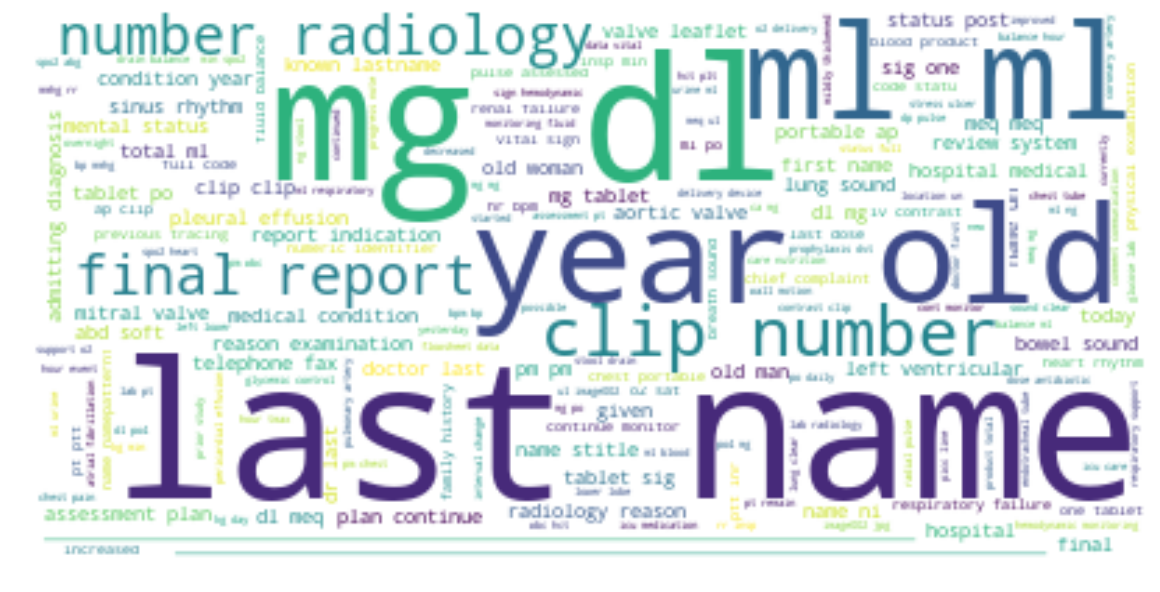

In [41]:
plt.figure(figsize = (20,20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show

In [45]:
from collections import Counter 

In [43]:
split_it = processed_notes.split()

In [46]:
Counter = Counter(split_it)

In [49]:
# most_common() produces k frequently encountered 
# input values and their respective counts. 
most_occur = Counter.most_common(20) 

In [50]:
print(most_occur)

[('.', 382319), (':', 270635), (',', 227521), ('[', 126702), (']', 126679), ('(', 106948), (')', 105850), ('-', 41908), ('pt', 29035), ('no', 26442), ('%', 22003), ('left', 21088), ('the', 20921), ('am', 20845), ('**', 20214), ('#', 20213), ('right', 19023), ('ml', 17646), ('patient', 16016), ('/', 15654)]
